# Proyek Analisis Data: Bike Sharing dataset
- **Nama:** Mochammad Alfajjar S
- **Email:** alfajjar123@gmail.com
- **ID Dicoding:** bang_jarrrz

## MENENTUKAN PERTANYAAN BISNIS
- Bagaimana pengaruh musim (season) terhadap jumlah total peminjaman sepeda (cnt) per hari?
- Bagaimana pola penggunaan sepeda (cnt) berubah berdasarkan jam dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [11]:
day_data = pd.read_csv('./data/day.csv')
hour_data = pd.read_csv('./data/hour.csv')


### Assessing Data

In [12]:
print(day_data.info())
print(hour_data.info())

print(day_data.head())
print(hour_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

### Cleaning Data

In [13]:
day_data['dteday'] = pd.to_datetime(day_data['dteday'])
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

print(day_data.isnull().sum())
print(hour_data.isnull().sum())

day_data = day_data.dropna()
hour_data = hour_data.dropna()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


## Exploratory Data Analysis (EDA)

### Explore ...

### Pertanyaan 1: Pengaruh Musim terhadap Jumlah Peminjaman Sepeda

In [15]:
seasonal_data = day_data.groupby('season')['cnt'].sum().reset_index()
seasonal_data['season'] = seasonal_data['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})

### Pertanyaan 2: Pola Penggunaan Sepeda Berdasarkan Jam

In [16]:
hourly_data = hour_data.groupby('hr')['cnt'].sum().reset_index()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pengaruh Musim terhadap Jumlah Peminjaman Sepeda

C:\Users\Alfajar\AppData\Local\Temp\ipykernel_11244\1811732149.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season', y='cnt', data=seasonal_data, palette='viridis')


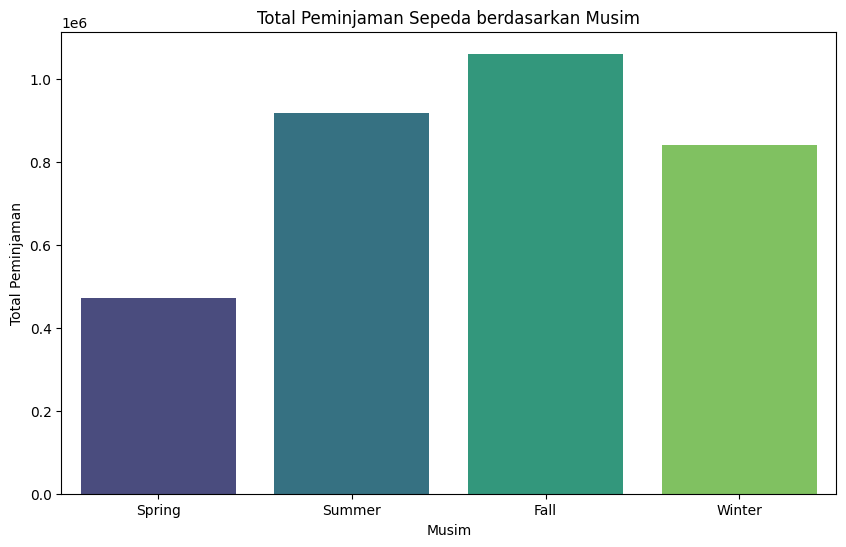

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=seasonal_data, palette='viridis')
plt.title('Total Peminjaman Sepeda berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Peminjaman')
plt.show()


### Pertanyaan 2: Pola Penggunaan Sepeda Berdasarkan Jam

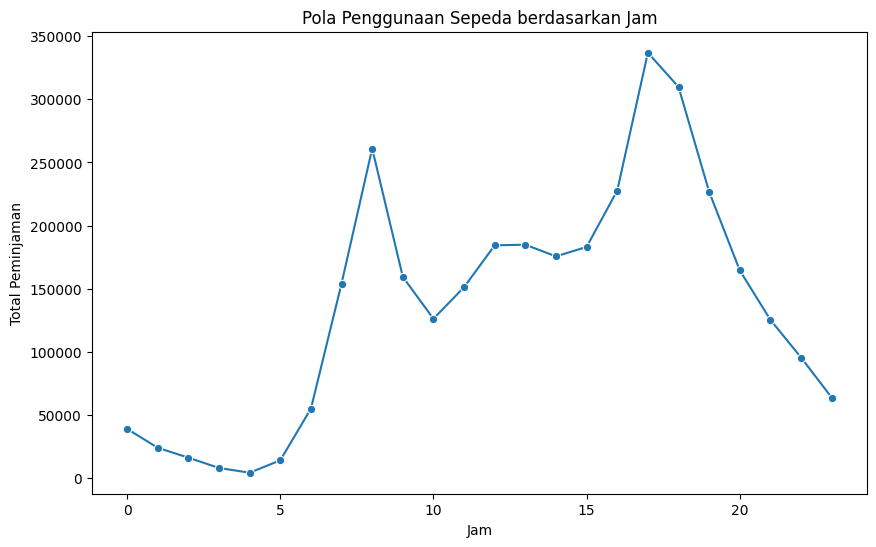

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='hr', y='cnt', data=hourly_data, marker='o')
plt.title('Pola Penggunaan Sepeda berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Total Peminjaman')
plt.show()


## Conclusion

- Kesimpulan Pertanyaan 1:
Musim dapat mempengaruhi jumlah total peminjaman sepeda. Misalnya, di musim panas (Summer), jumlah peminjaman sepeda mungkin lebih tinggi dibandingkan musim dingin (Winter) karena cuaca yang lebih baik dan hari yang lebih panjang.

- Kesimpulan Pertanyaan 2:
Pola penggunaan sepeda berdasarkan jam menunjukkan tren tertentu, seperti peningkatan jumlah peminjaman pada jam-jam tertentu, seperti saat pagi dan sore hari, yang mungkin terkait dengan waktu orang pergi dan pulang kerja.